In [ ]:
!pip install deap

Installing DEAP

DEAP - Distributed Evolutionary Algorithms in Python

DEAP is a Python framework for implementing distributed evolutionary algorithms. It facilitates the creation and optimization of custom algorithms for various optimization problems.

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
from deap import base
from deap import creator
from deap import tools
from deap import algorithms

Importing necessary modules and packages for evolutionary computation using DEAP:-


*   random for random number generation
*   numpy for numerical operations
*   matplotlib for plotting
*   DEAP's base, creator, and tools modules for defining evolutionary algorithms and manipulating individuals and populations.









In [ ]:
num_locations = 50;
location_points = [(random.randint(0, 100), random.randint(0, 100)) for _ in range(num_locations)]
depot = (50 ,50)
num_vehicles = 1

defining variables


*   num_locations = number of locations that needs to be visited
*   location_points = co-ordinates of the locations
*   depot = co-ordinates of the depot i.e, starting points of all vehicles
*   num_vehicles = number of vehicles we have



In [ ]:
creator.create("FitnessMin" , base.Fitness , weights=(-1.0 ,-1.0))
creator.create("Individual" , list , fitness=creator.FitnessMin)

Setting up for genetic algorithm -



*   Defining a Fitness Function that needs to minimized given the objectives which are total distance travelled and balance penalty


*   Defining Individual Structure , here that are the lists with fitness attributes




In [ ]:
toolbox = base.Toolbox()
toolbox.register("indices" , random.sample , range(num_locations) , num_locations)
toolbox.register("individual" , tools.initIterate , creator.Individual , toolbox.indices)
toolbox.register("population" , tools.initRepeat , list , toolbox.individual)

setting up a toolbox with functions for generating individuals and populations for an evolutionary algorithm.

In [ ]:
def evaluate(individual):
    total_dist = 0
    distances = []

    for i in range(num_vehicles):
        route = [depot] + [location_points[individual[j]] for j in range(i , len(individual) , num_vehicles)] + [depot]

        vehicle_dist = sum(np.linalg.norm(np.array(route[k+1]) - np.array(route[k])) for k in range(len(route) - 1))
        total_dist += vehicle_dist

        distances.append(vehicle_dist)
    balance_penalty = np.std(distances)
    return total_dist , balance_penalty


Evaluating the fitness of an individual by calculating the total distance traveled by all vehicles and penalizing imbalance in the distribution of distances among vehicles.

In [ ]:
toolbox.register("evaluate" , evaluate)
toolbox.register("mate" , tools.cxPartialyMatched)
toolbox.register("mutate" , tools.mutShuffleIndexes , indpb=0.075)
toolbox.register("select" , tools.selTournament , tournsize=3)

 Registering the necessary evolutionary operators (evaluation, mating, mutation, and selection) in the toolbox, enabling their use during the evolutionary process.







In [ ]:
def plot_routes(individual):
    plt.figure(figsize=(10, 6))

    for (x, y) in location_points:
        plt.plot(x, y, 'bo', markersize=8)

    plt.plot(depot[0], depot[1], 'rs', markersize=8, label='Depot')
    plt.text(depot[0], depot[1], 'Depot', verticalalignment='bottom', horizontalalignment='right', color='red', fontsize=10)

    for i in range(num_vehicles):
        route = [depot] + [location_points[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        plt.plot(*zip(*route), '-', label=f'Vehicle {i+1}')

        for k, (x, y) in enumerate(route):
            plt.text(x, y, f'{k}', verticalalignment='bottom', horizontalalignment='right', color='black', fontsize=8)

    plt.legend()
    plt.grid(True)
    plt.xlabel('X-Coordinate')
    plt.ylabel('Y-Coordinate')
    plt.title('Vehicle Routes Visualization')
    plt.show()

Function to create a plot to visualize the locations, depot, and routes of vehicles based on the given individual solution.

gen	nevals	avg    	min
0  	300   	1400.37	0  
1  	219   	1359.64	0  
2  	224   	1330.91	0  
3  	234   	1316.91	0  
4  	220   	1298.47	0  
5  	215   	1278.47	0  
6  	241   	1269.75	0  
7  	218   	1270.08	0  
8  	241   	1257.29	0  
9  	232   	1248.15	0  
10 	216   	1237.24	0  
11 	231   	1238.25	0  
12 	217   	1229.25	0  
13 	212   	1213.77	0  
14 	230   	1212.4 	0  
15 	231   	1208.04	0  
16 	227   	1198.72	0  
17 	237   	1193.32	0  
18 	234   	1188.73	0  
19 	214   	1159.85	0  
20 	238   	1151.13	0  
21 	215   	1132.84	0  
22 	228   	1113.85	0  
23 	230   	1088.8 	0  
24 	244   	1076.88	0  
25 	230   	1054.81	0  
26 	231   	1042.54	0  
27 	230   	1035.34	0  
28 	215   	1021.1 	0  
29 	225   	1007.34	0  
30 	221   	996.971	0  
31 	235   	986.56 	0  
32 	241   	978.28 	0  
33 	239   	965.106	0  
34 	230   	948.7  	0  
35 	236   	931.373	0  
36 	234   	925.037	0  
37 	233   	912.237	0  
38 	224   	901.185	0  
39 	230   	890.053	0  
40 	209   	865.97 	0  
41 	234   	853.792	0  
42 	223   	

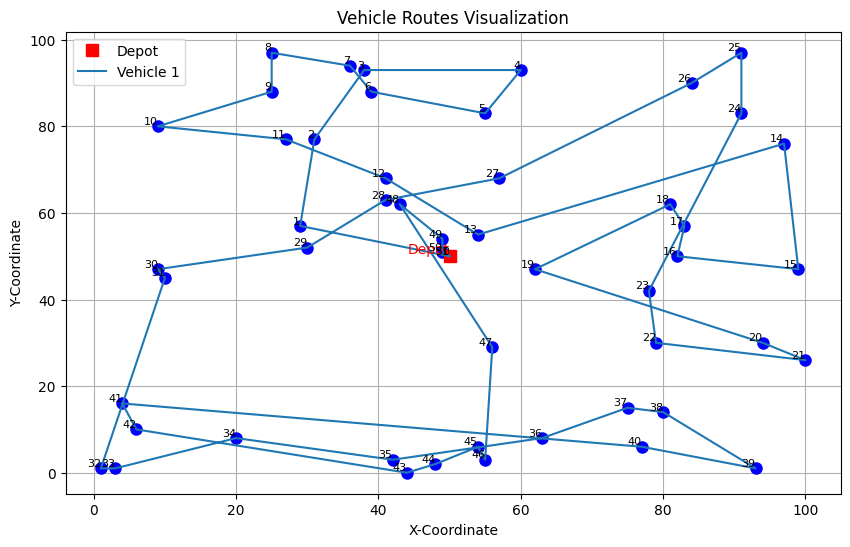

In [ ]:
def main():
    random.seed(42)
    pop = toolbox.population(n=300)
    hof = tools.HallOfFame(1)

    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg" , np.mean)
    stats.register("min" , np.min)

    algorithms.eaSimple(pop , toolbox , 0.7 , 0.2 , 300 , stats = stats , halloffame = hof)

    plot_routes(hof[0])
    return pop , stats , hof

if __name__ == "__main__":
    main()